In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
import nltk
from collections import Counter
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

## Carga de datos

In [37]:
df = pd.read_csv('../data/GrammarandProductReviews.csv')

In [38]:
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [39]:
# Drop columns that are not needed
df = df[["brand", "categories", "manufacturer", "name", "reviews.text", "reviews.username", "reviews.rating"]]

In [40]:
# Remove NA values on reviews.text
df.dropna(subset=['reviews.text'], inplace=True)

In [41]:
df.head()

,brand,categories,manufacturer,name,reviews.text,reviews.username,reviews.rating
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Joshua,5
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Dorothy W,5
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.,Dorothy W,5
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,Rebecca,1
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,Walker557,1


In [42]:
# clean the text
def clean_text(text):
    # set text to lowercase
    text = text.lower()

    # remove special characters
    text = re.sub('\[.*?\]', '', text)

    # remove numbers
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # remove new line characters
    text = re.sub('\w*\d\w*', '', text)

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # remove urls
    text = re.sub(r'http\S+', '', text)

    # remove numbers
    text = re.sub(r'\d+', '', text)

    return text

df['cleaned_text'] = df['reviews.text'].apply(lambda x: clean_text(x))

In [43]:
df.head()

,brand,categories,manufacturer,name,reviews.text,reviews.username,reviews.rating,cleaned_text
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Joshua,5,love album good hip hop side current pop sound...
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Dorothy W,5,good flavor review collected part promotion
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.,Dorothy W,5,good flavor
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,Rebecca,1,read reviews looking buying one couples lubric...
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,Walker557,1,husband bought gel us gel caused irritation fe...


## Análisis exploratorio

In [44]:
all_reviews_text = ' '.join(df['cleaned_text'])

word_counts = Counter(all_reviews_text.split())

word_by_product = df.groupby('name')['cleaned_text'].apply(lambda x: ' '.join(x))
most_common_by_product = word_by_product.apply(lambda text: Counter(text.split()).most_common(1))

print("Palabra más repetida por producto:")
print(most_common_by_product)

Palabra más repetida por producto:
name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest          [(well, 3)]
100:Complete First Season (blu-Ray)                                   [(show, 92)]
12110209 - Honeywell Quietset 8-Speed Tower Fan Oscillating           [(fan, 248)]
16ct Peppa Pig Lunch Napkins                                            [(got, 3)]
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black     [(pages, 3)]
                                                                         ...      
Working Girl (dvd)                                                   [(movie, 23)]
Yardley Of London Bath and Shower Gel, Exfoliating Sea Minerals       [(found, 1)]
Yes To Carrots Nourishing Body Wash                                   [(skin, 53)]
Yes To Grapefruit Rejuvenating Body Wash                              [(body, 32)]
bareMinerals Original Foundation Broad Spectrum Spf 15, Medium         [(love, 2)]
Name: cleaned_text, Length: 598, dtype: object


In [45]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

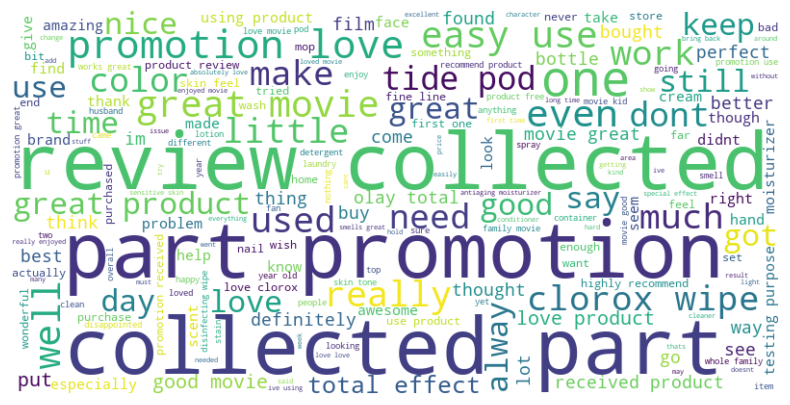

In [46]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

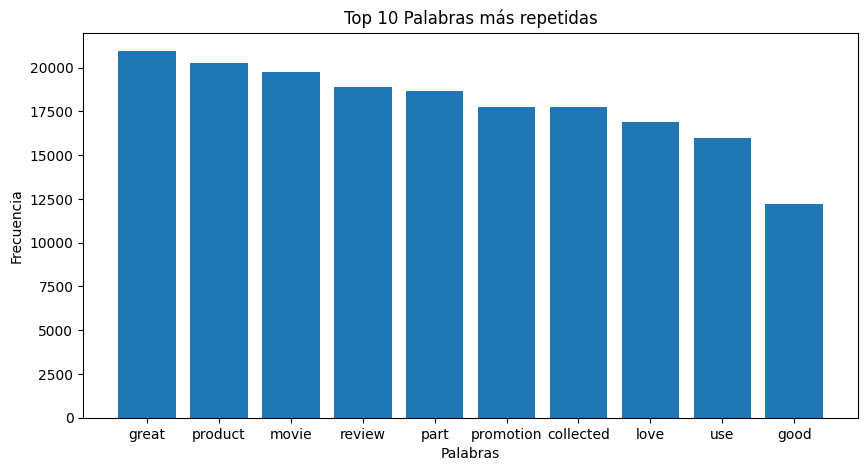

In [47]:
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 10 Palabras más repetidas')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

## Analisis de palabras

In [50]:
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\monto\AppData\Roaming\nltk_data...


In [51]:
vader_lexicon = sia.lexicon
def count_vader_sentiment_words(text, lexicon):
    words = text.split()
    positive_count = sum(1 for word in words if word in lexicon and lexicon[word] > 0)
    negative_count = sum(1 for word in words if word in lexicon and lexicon[word] < 0)
    return positive_count, negative_count

# Count positive and negative words
df['positive_count'], df['negative_count'] = zip(*df['cleaned_text'].apply(lambda x: count_vader_sentiment_words(x, vader_lexicon)))

In [55]:
def determine_sentiment(pos_count, neg_count):
    if pos_count > neg_count:
        return 'Positive'
    elif neg_count > pos_count:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df.apply(lambda row: determine_sentiment(row['positive_count'], row['negative_count']), axis=1)

In [56]:
df.head()

,brand,categories,manufacturer,name,reviews.text,reviews.username,reviews.rating,cleaned_text,positive_count,negative_count,sentiment
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Joshua,5,love album good hip hop side current pop sound...,2,1,Positive
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Dorothy W,5,good flavor review collected part promotion,1,0,Positive
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.,Dorothy W,5,good flavor,1,0,Positive
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,Rebecca,1,read reviews looking buying one couples lubric...,2,5,Negative
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,Walker557,1,husband bought gel us gel caused irritation fe...,2,1,Positive


## Analisis

### 6.1

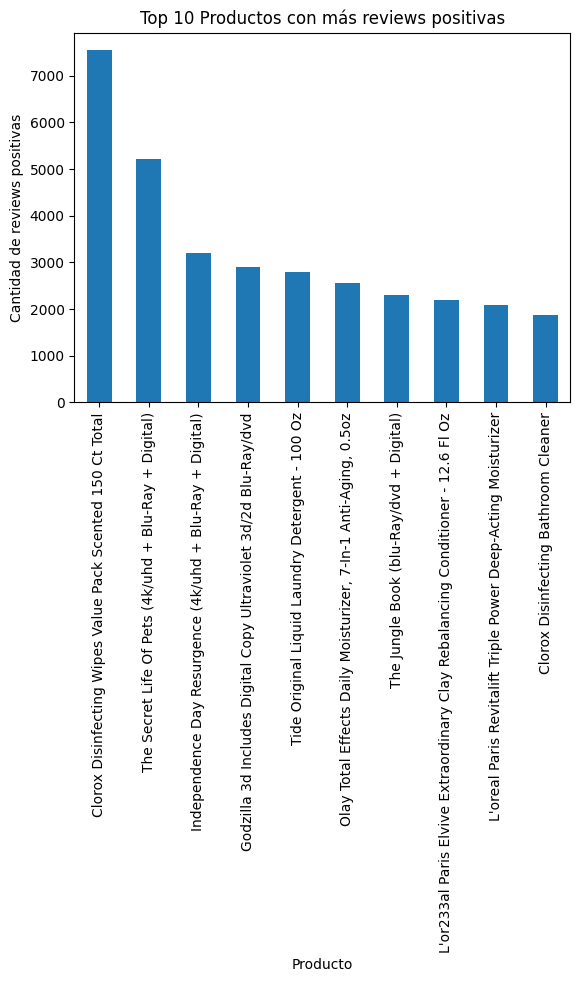

In [57]:
# Get the top 10 products with the most positive reviews and plot them
top_10_positive_products = df[df['sentiment'] == 'Positive'].groupby('name').size().nlargest(10)
top_10_positive_products.plot(kind='bar', title='Top 10 Productos con más reviews positivas', xlabel='Producto', ylabel='Cantidad de reviews positivas')
plt.show()


### 6.2

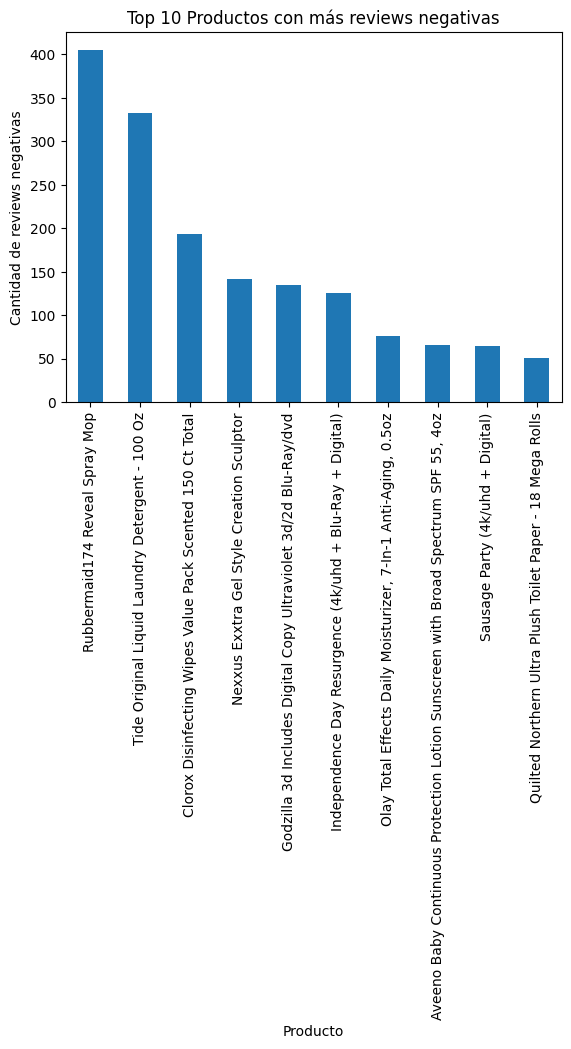

In [58]:
# Top 10 products with the most negative reviews, plot them
top_10_negative_products = df[df['sentiment'] == 'Negative'].groupby('name').size().nlargest(10)
top_10_negative_products.plot(kind='bar', title='Top 10 Productos con más reviews negativas', xlabel='Producto', ylabel='Cantidad de reviews negativas')
plt.show()


### 6.3

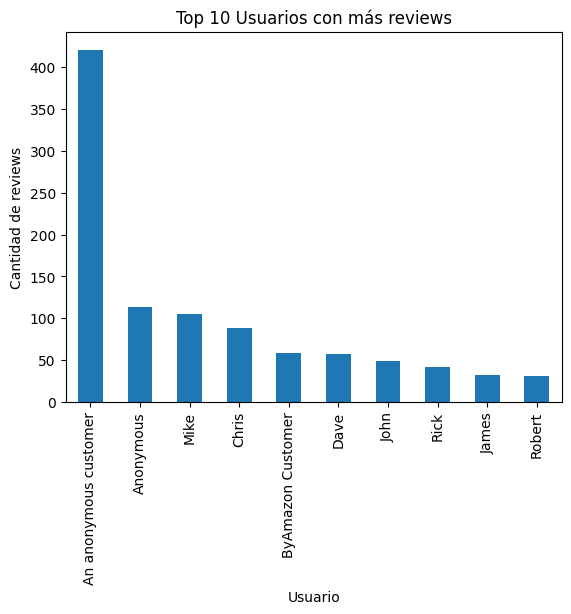

In [59]:
# Top 10 users with the most reviews to different products and plot them
top_10_users = df.groupby('reviews.username').size().nlargest(10)
top_10_users.plot(kind='bar', title='Top 10 Usuarios con más reviews', xlabel='Usuario', ylabel='Cantidad de reviews')
plt.show()

Se puede observar que la mayor parte de las reviews son hechas de forma anónima.

### 6.4

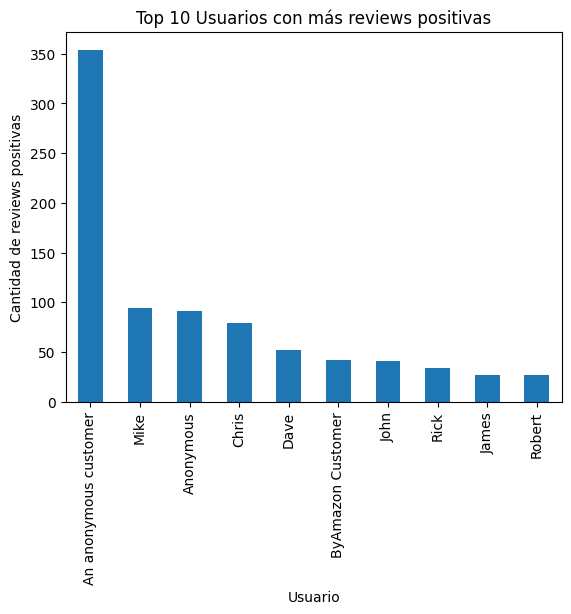

In [61]:
# top 10 users with the most positive reviews
top_10_positive_users = df[df['sentiment'] == 'Positive'].groupby('reviews.username').size().nlargest(10)
top_10_positive_users.plot(kind='bar', title='Top 10 Usuarios con más reviews positivas', xlabel='Usuario', ylabel='Cantidad de reviews positivas')
plt.show()


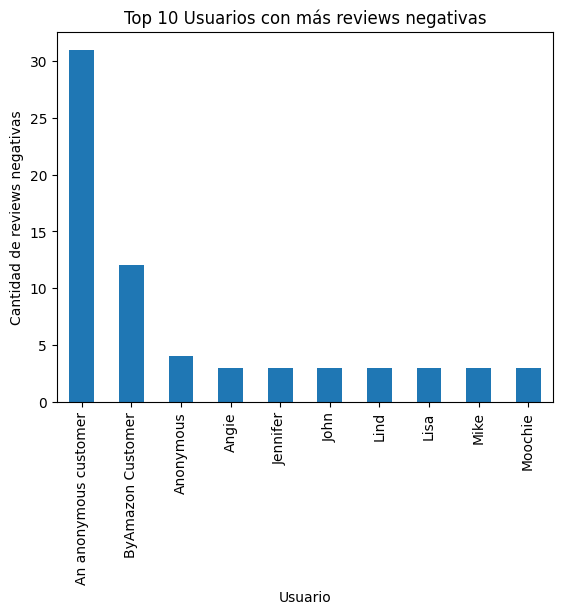

In [62]:
# top 10 users with the most negative reviews
top_10_negative_users = df[df['sentiment'] == 'Negative'].groupby('reviews.username').size().nlargest(10)
top_10_negative_users.plot(kind='bar', title='Top 10 Usuarios con más reviews negativas', xlabel='Usuario', ylabel='Cantidad de reviews negativas')
plt.show()

Como era de esperarse luego de analizar todas las reviews, tanto la mayor parte de las reviews positivas como negativas están hechas por usuarios anónimos.

### 6.5

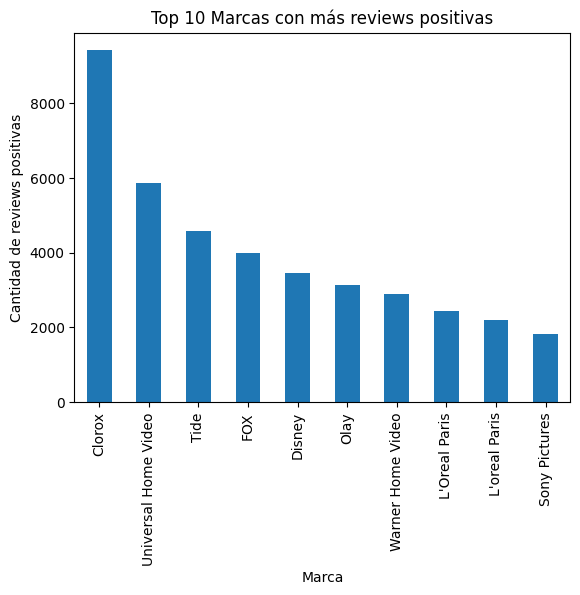

In [63]:
# top 10 brands with the most positive reviews
top_10_positive_brands = df[df['sentiment'] == 'Positive'].groupby('brand').size().nlargest(10)
top_10_positive_brands.plot(kind='bar', title='Top 10 Marcas con más reviews positivas', xlabel='Marca', ylabel='Cantidad de reviews positivas')
plt.show()

### 6.6

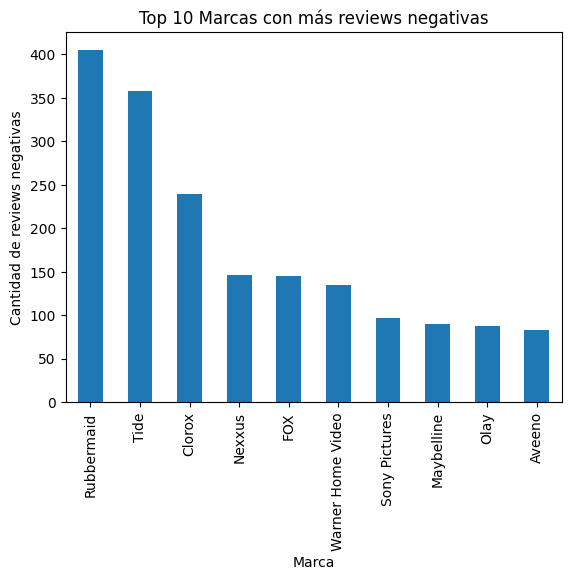

In [64]:
# top 10 brands with the most negative reviews
top_10_negative_brands = df[df['sentiment'] == 'Negative'].groupby('brand').size().nlargest(10)
top_10_negative_brands.plot(kind='bar', title='Top 10 Marcas con más reviews negativas', xlabel='Marca', ylabel='Cantidad de reviews negativas')
plt.show()

### Extra

C:\Users\monto\AppData\Local\Temp\ipykernel_20352\2189746695.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  positive_negative_reviews = df.groupby('brand').apply(lambda x: x[x['sentiment'] == 'Positive'].shape[0] - x[x['sentiment'] == 'Negative'].shape[0])


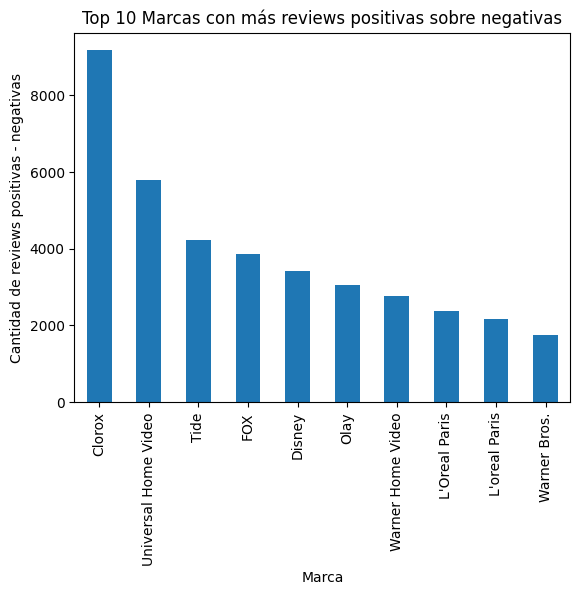

In [66]:
# top 10 brands with the most positive reviews over negative reviews (positive reviews - negative reviews)
positive_negative_reviews = df.groupby('brand').apply(lambda x: x[x['sentiment'] == 'Positive'].shape[0] - x[x['sentiment'] == 'Negative'].shape[0])
top_10_positive_negative_brands = positive_negative_reviews.nlargest(10)
top_10_positive_negative_brands.plot(kind='bar', title='Top 10 Marcas con más reviews positivas sobre negativas', xlabel='Marca', ylabel='Cantidad de reviews positivas - negativas')
plt.show()

C:\Users\monto\AppData\Local\Temp\ipykernel_20352\2068224831.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  negative_positive_reviews = df.groupby('brand').apply(lambda x: x[x['sentiment'] == 'Negative'].shape[0] - x[x['sentiment'] == 'Positive'].shape[0])


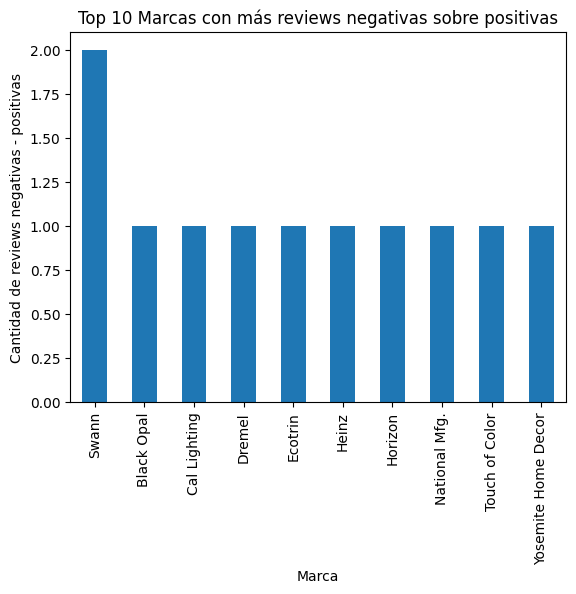

In [67]:
# top 10 brands with the most negative reviews over positive reviews (negative reviews - positive reviews)
negative_positive_reviews = df.groupby('brand').apply(lambda x: x[x['sentiment'] == 'Negative'].shape[0] - x[x['sentiment'] == 'Positive'].shape[0])
top_10_negative_positive_brands = negative_positive_reviews.nlargest(10)
top_10_negative_positive_brands.plot(kind='bar', title='Top 10 Marcas con más reviews negativas sobre positivas', xlabel='Marca', ylabel='Cantidad de reviews negativas - positivas')
plt.show()

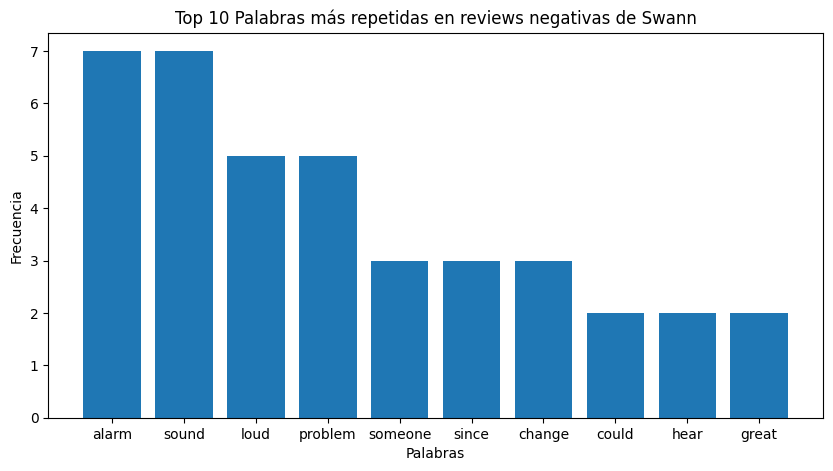

In [68]:
# Most common words in negative reviews for Swann
swann_negative_reviews = df[(df['brand'] == 'Swann') & (df['sentiment'] == 'Negative')]['cleaned_text']
swann_negative_reviews_text = ' '.join(swann_negative_reviews)
swann_negative_word_counts = Counter(swann_negative_reviews_text.split())
swann_negative_most_common_words = swann_negative_word_counts.most_common(10)
words, counts = zip(*swann_negative_most_common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 10 Palabras más repetidas en reviews negativas de Swann')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

## Estrategia

Se puede observar que al analizar únicamente las reviews positivas y las negativas de cada una de las marcas, varias marcas como Clorox, Tide y FOX aparecen en el top 10 en ambos casos. Esto se debe a que son marcas muy grandes, como se puede ver en el total de reviews, estas mismas marcas también aparecen en dicho review, por lo que no se puede obtener una conclusión contundente respecto a esto, ya que la cantidad de comentarios negativos respecto a los positivos es mínima.

Para encontrar las marcas con mayor cantidad de reviews negativas se realizó una resta para obtener la cantidad absoluta de comentarios negativos por marca. En este análisis se obtuvo que la marca Swann es la que tiene la mayor proporción de comentarios negativos respecto de sus comentarios positivos. Debido a esto se analizaron las palabras más usadas en sus reviews negativas, obteniendo que se suele repetir "Alarm", "Sound" y "Loud".

Sabiendo que Swann parece una marca dedicada a la venta de alarmas de seguridad, podemos concluir que sus clientes se quejan de la mala calidad en el funcionamiento de el sonido de dichas alarmas, en especial parece ser que el sonido producido por dicha alarma es demasiado alto. El descontento puede ser producido por diferentes motivos, pero muchas veces cuando se busca una alarma, se busca que sea discreta, para que el intruso no sepa que fue descubierto. Debido a esto la empresa Swann debería buscar una alternativa más cautelosa de informar a sus usuarios respecto a cualquier intruso que haya activado su sistema de alarmas.